In [117]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt 

In [118]:
img1 = cv.imread("DATA/dog_backpack.png")
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.imread("DATA/watermark_no_copy.png")
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)



NameError: name 'cv2' is not defined

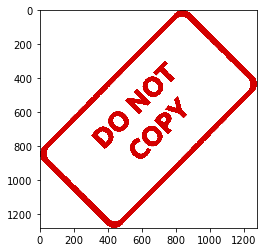

In [6]:
plt.imshow(img2)

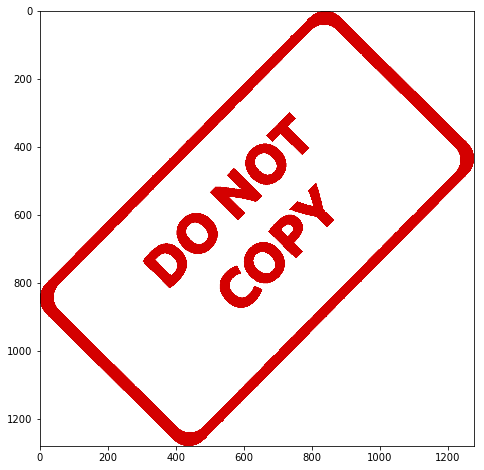

In [7]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.imshow(img2)

In [8]:
img2 = cv.resize(img2,(600,600))

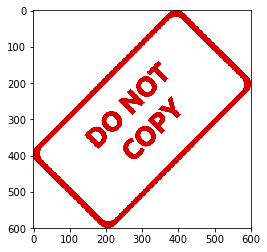

In [10]:
plt.imshow(img2)

In [11]:
img2.shape

(600, 600, 3)

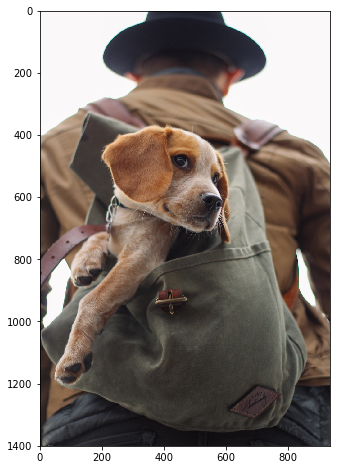

In [17]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.imshow(img1)

In [18]:
img1.shape

(1401, 934, 3)

In [21]:
dogcut = img1[1401-600:1401 , 934-600:934]

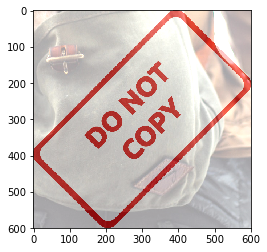

In [96]:
new = cv.addWeighted(dogcut , 0.8 , img2 , 0.6, 0 )

plt.imshow(new)

#  we dont require this 

In [81]:
# so what we do is 

# Converting image to gray scale 

grayimg2 = cv.cvtColor(img2 ,cv.COLOR_RGB2GRAY)


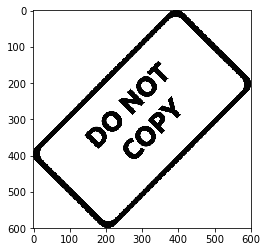

In [86]:
plt.imshow(grayimg2, cmap='gray')

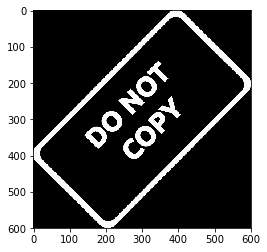

In [97]:
# to create a mask we have to take inverse of image 

mask_inv = cv.bitwise_not(grayimg2)
plt.imshow(mask_inv, cmap='gray')

In [99]:
mask_inv.shape

# its haoe no longer contain color channels 
#  so we have to add 3 channels to make both images compatible for blending 

#  size and channels should be same 

(600, 600)

In [106]:
#to odd 3 channels in image we have two methods to do that 
#  first is by stackoverflow



# img = np.array(grayimg2)
# stacked_img = np.stack((grayimg2,)*3, axis=-1)



#  second by sir joe udemy

white_background = np.full(img2.shape ,255 , dtype=np.uint8)

In [107]:
white_background.shape

(600, 600, 3)

In [108]:
bk = cv.bitwise_or(white_background,white_background,mask=mask_inv)


# dogcut.shape
# pasted = cv.addWeighted(dogcut,0.8,stacked_img,0.5,0)
# stackup = dogcut + stacked_img

In [109]:
bk.shape

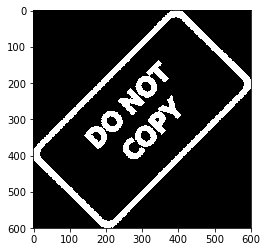

In [119]:
plt.imshow(bk)

In [124]:
fg = cv.bitwise_or(img2,img2,mask_inv)
fg.shape

(600, 600, 3)

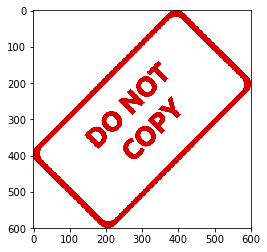

In [121]:
plt.imshow(fg)

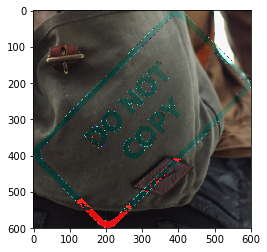

In [123]:
img3 = dogcut + fg
plt.imshow(img3)

bil = cv.medianBlur(stacked_img,7)

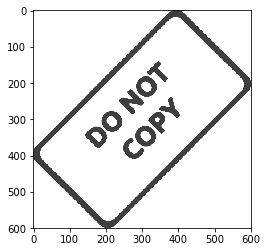

In [75]:
plt.imshow(bil)

In [77]:
inv = cv.bitwise_not(bil)

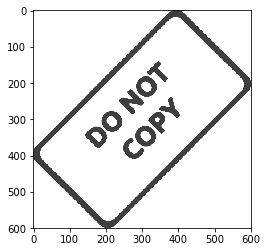

In [78]:
plt.imshow(bil)

In [79]:
stackup = dogcut + bil

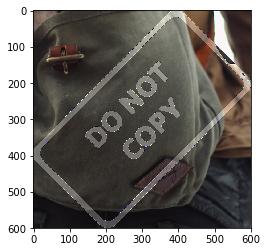

In [80]:
plt.imshow(stackup)